In [1]:
# Generic imports
import pandas as pd
import plotly
import plotly.graph_objects as go

# 5G visualization logic
import trace_plotting
from utils.wireshark import import_pcap_as_dataframe
import logging
import re
import platform

In [2]:
# Wireshark trace with 5GC messages
#wireshark_trace = 'D:\\Temp\\free5gc.pcap'
#wireshark_trace = 'D:\\Temp\\volte_calls_2.pcapng'
#wireshark_trace = 'D:\\Temp\\s1ap_volte.pcapng'
#wireshark_trace = 'D:\\Temp\\SIP MT offnet.pcap'
wireshark_trace = 'D:\\Temp\\registration_open5gs.pcapng'

In [3]:
if isinstance(wireshark_trace, list):
    output_name_files = wireshark_trace[0]
else:
    output_name_files = wireshark_trace
output_name_files = '.'.join(output_name_files.split('.')[0:-1])

http2_ports= "29502,29503,29504,29507,29509,29518,"
# DEBUG loggig level for big traces so that you can see if processing is stuck or not
packets_df = import_pcap_as_dataframe(
    wireshark_trace, 
    http2_ports = http2_ports+"32445,5002,5000,32665,80,32077,5006,8080,3000,8081,29502,37904",
    wireshark_version = 'OS',
    platform = platform.system(),
    logging_level=logging.INFO,
    remove_pdml=True)
display(packets_df)

,ip_src,ip_dst,port_src,port_dst,transport_protocol,frame_number,protocol,msg_description,timestamp,timestamp_offset,datetime,summary_raw,summary,file,file_idx
0,127.0.0.1,127.0.0.5,39582,38412,sctp,1,NGAP,NGAP-PDU: 00150041000004001b00090009f107500000...,1.620368e+09,0.000000,2021-05-07 06:19:23.631686449,NGAP NGSetup (21),NAS NGSetup (21),D:\Temp\registration_open5gs.pcapng,0
1,127.0.0.5,127.0.0.1,38412,39582,sctp,2,NGAP,NGAP-PDU: 201500320000040001000e05806f70656e35...,1.620368e+09,0.000131,2021-05-07 06:19:23.631817341,NGAP NGSetup (21),NAS NGSetup (21),D:\Temp\registration_open5gs.pcapng,0
2,127.0.0.1,127.0.0.5,39582,38412,sctp,3,NGAP,NGAP-PDU: 000f40520000050055000200010026002423...,1.620368e+09,7.737889,2021-05-07 06:19:31.369575262,"NGAP InitialUEMessage (15),\nNAS Registration ...",NAS Registration request (0x41),D:\Temp\registration_open5gs.pcapng,0
3,127.0.0.5,127.0.0.1,38412,39582,sctp,4,NGAP,NGAP-PDU: 00044018000003000a000200010055000200...,1.620368e+09,7.738143,2021-05-07 06:19:31.369829655,"NGAP DownlinkNASTransport (4),\nNAS Registrati...",NAS Registration reject (0x44),D:\Temp\registration_open5gs.pcapng,0
4,127.0.0.5,127.0.0.1,38412,39582,sctp,5,NGAP,NGAP-PDU: 002900100000020072000400010001000f40...,1.620368e+09,7.738172,2021-05-07 06:19:31.369858503,NGAP UEContextRelease (41),NAS UEContextRelease (41),D:\Temp\registration_open5gs.pcapng,0
5,127.0.0.1,127.0.0.5,39582,38412,sctp,6,NGAP,NGAP-PDU: 20290026000003000a000200010055000200...,1.620368e+09,7.738246,2021-05-07 06:19:31.369932890,NGAP UEContextRelease (41),NAS UEContextRelease (41),D:\Temp\registration_open5gs.pcapng,0


In [4]:
procedure_df, procedure_frames_df = trace_plotting.calculate_procedure_length(packets_df)
#pd.set_option('display.max_rows', 10)
#display(procedure_df)

display('Average procedure length (ms)')
mean_values = procedure_df.groupby('name')['length_ms'].mean()
min_values = procedure_df.groupby('name')['length_ms'].min()
max_values = procedure_df.groupby('name')['length_ms'].max()
count_values = procedure_df.groupby('name')['length_ms'].count()
summary_values = mean_values.reset_index()
summary_values = summary_values.rename(columns={'length_ms':'mean_procedure_time_ms'})
summary_values['min_procedure_time_ms'] = min_values.reset_index()['length_ms']
summary_values['max_procedure_time_ms'] = max_values.reset_index()['length_ms']
summary_values['count'] = count_values.reset_index()['length_ms']
summary_values = summary_values.set_index('name')
display(summary_values)
with open(output_name_files + '_summary.txt', 'w') as f:
    f.write(summary_values.to_string())
#display(procedure_df)
#display(procedure_frames_df)

'Average procedure length (ms)'

,mean_procedure_time_ms,min_procedure_time_ms,max_procedure_time_ms,count
name,,,,
NAS UE Registration,0.254393,0.254393,0.254393,1


In [5]:
procedure_df

,name,RAN_UE_NGAP_ID,length_ms,start_frame,end_frame,start_timestamp,end_timestamp,start_datetime,end_datetime
0,NAS UE Registration,1,0.254393,3,4,1.620368e+09,1.620368e+09,2021-05-07 06:19:31.369575262,2021-05-07 06:19:31.369829655


In [6]:
procedure_frames_df

,ip_src,ip_dst,port_src,port_dst,transport_protocol,frame_number,protocol,msg_description,timestamp,timestamp_offset,datetime,summary_raw,summary,file,file_idx,AMF-UE-NGAP-ID,RAN-UE-NGAP-ID,HTTP_STREAM,HTTP_PROCEDURE,HTTP_TYPE
2,127.0.0.1,127.0.0.5,39582,38412,sctp,3,NGAP,NGAP-PDU: 000f40520000050055000200010026002423...,1.620368e+09,7.737889,2021-05-07 06:19:31.369575262,"NGAP InitialUEMessage (15),\nNAS Registration ...",NAS Registration request (0x41),D:\Temp\registration_open5gs.pcapng,0,,1,,,
3,127.0.0.5,127.0.0.1,38412,39582,sctp,4,NGAP,NGAP-PDU: 00044018000003000a000200010055000200...,1.620368e+09,7.738143,2021-05-07 06:19:31.369829655,"NGAP DownlinkNASTransport (4),\nNAS Registrati...",NAS Registration reject (0x44),D:\Temp\registration_open5gs.pcapng,0,1,1,,,


In [7]:
import plotly.graph_objects as go

bin_size = 3

procedure_names = list(procedure_df['name'].unique())
procedure_names.sort()
histogram_traces = []

for procedure_name in procedure_names:
    proc_data = procedure_df[procedure_df['name']==procedure_name]
    hist_array, hist_bins, hist_labels = trace_plotting.get_histogram_data(
        proc_data.loc[:,'length_ms'], 
        bin_size, 
        density=False, 
        remove_trailing_zeros=False, 
        output_labels=True,
        label_unit='ms')
    histogram_line = go.Bar(
        x=hist_bins,
        y=hist_array,
        name=procedure_name,
        text=hist_labels,
        opacity=0.65,
        showlegend=True,
        #marker={'line':{'width':0}},
        hovertemplate="<br>".join([
            "duration: %{text}",
            "occurrences: %{y}"])
    )
    histogram_traces.append(histogram_line)

fig = go.Figure(data=histogram_traces, layout = { 'bargap': 0 })

fig.update_layout(barmode='overlay')
fig.update_xaxes(title_text='Procedure length (ms)')
fig.update_yaxes(title_text='Occurrence')
fig.show()

fig.write_html(output_name_files + '_procedure_length.html')

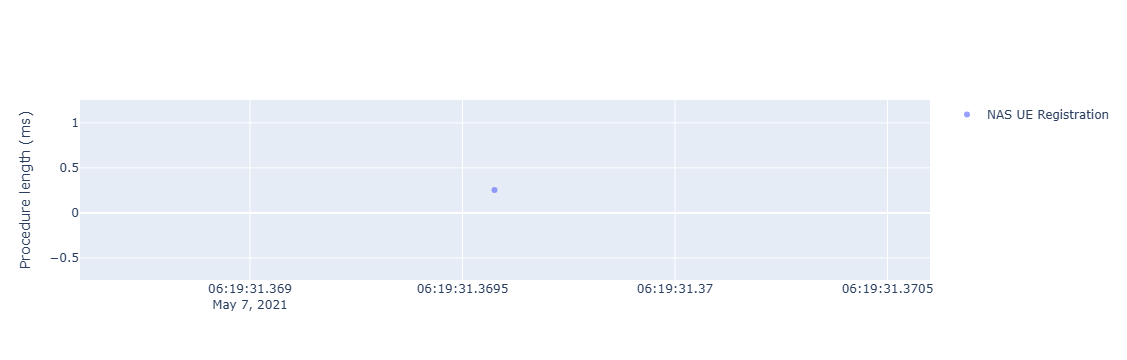

In [8]:
plot_data = trace_plotting.generate_scatterplots_for_wireshark_traces(
    procedure_df, 
    filter_column='name', 
    datetime_column='start_datetime', 
    summary_column='length_ms', 
    protocol_column='name', 
    frame_number_column='start_frame', 
    auto_color=True,
    y_unit='ms',
    hide_series=False,
    opacity=0.65)
fig = go.Figure(data=plot_data)
fig.update_yaxes(title_text='Procedure length (ms)')
fig.show()

fig.write_html(output_name_files + '_procedure_timeline.html')